<a href="https://colab.research.google.com/github/LyanhVini/Analysis-of-Anthropic-Indicators-in-Amazonian-Communities-/blob/main/Clustering/Clustering_Comunidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

suponha que eu tenha uma base de dados que contém o resultado de um questionário aplicado a comunidades de origem amazônica. O questionário contém 25 perguntas, que corresponde a um único eixo de estudo, avaliadas em uma escala de 1 à 5, sendo para cada nível da escala corresponde a uma determinada resposta da população, sendo (1) para NUNCA OU INEXISTENTE, (2) QUASE NUNCA, (3) MAIS OU MENOS, (4) QUASE SEMPRE e (5) SEMPRE. O dataset tem dimensão de 99x26, sendo 25 às colunas referente as perguntas e 1 coluna indicando a qual comunidade a pessoa pertence

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kmodes
!pip install -U ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 20.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=26cfc026cad0001f9c7dfec8d44097843114adfd692f17d25330efbf28753221
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

## SOBREVIVÊNCIA/NECESSIDADES HUMANAS - Perguntas 1 a 25

In [ ]:
eixo_1 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidades.xlsx").filter(["P01", "P02", "P03", "P04", "P05", "P06", "P07", "P08", "P09", "P10", "P11", "P12", "P13", "P14", "P15", "P16", "P17", "P18", "P19", "P20", "P21", "P22", "P23", "P24", "P25", "Comunidades"])
eixo_1 = eixo_1.loc[0:108].reset_index(drop=True)
eixo_1

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,Comunidades
0,5,5,5,3,5,3,3,3,2,4,...,2,2,2,2,5,5,3,3,3,Curiau
1,5,5,3,3,3,4,5,5,3,3,...,2,2,4,3,3,3,3,3,3,Curiau
2,5,5,5,4,5,5,5,5,2,3,...,3,5,5,4,3,5,5,3,3,Curiau
3,4,5,4,3,4,5,5,4,3,4,...,1,2,2,3,5,4,3,3,4,Curiau
4,5,5,3,3,5,5,5,5,3,4,...,1,1,3,3,5,5,3,3,3,Curiau
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,5,5,4,5,5,5,4,4,4,5,...,4,3,5,4,5,5,4,4,5,Tembé
105,5,5,5,5,5,5,5,4,4,5,...,4,4,5,4,5,5,5,4,5,Tembé
106,5,5,4,5,5,5,5,5,3,5,...,4,3,4,4,5,5,5,3,5,Tembé
107,5,4,4,5,5,5,5,4,2,5,...,3,4,4,4,5,5,5,3,5,Tembé


### Análise a partir dos clusters

Processando os dados

Tratando dados nulos

In [ ]:
eixo_1.replace('X', pd.NA, inplace=True)

In [ ]:
eixo_1.dropna(inplace=True)

In [ ]:
eixo_1.shape

(99, 26)

Extraindo o label das comunidades

In [ ]:
comunidades = eixo_1['Comunidades']
comunidades.reset_index(drop=True, inplace=True)
comunidades

0     Curiau
1     Curiau
2     Curiau
3     Curiau
4     Curiau
       ...  
94     Tembé
95     Tembé
96     Tembé
97     Tembé
98     Tembé
Name: Comunidades, Length: 99, dtype: object

Determinando o número de clusters

In [ ]:
df1 = eixo_1.drop('Comunidades', axis=1)
df1

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25
1,5,5,3,3,3,4,5,5,3,3,...,3,2,2,4,3,3,3,3,3,3
2,5,5,5,4,5,5,5,5,2,3,...,4,3,5,5,4,3,5,5,3,3
3,4,5,4,3,4,5,5,4,3,4,...,2,1,2,2,3,5,4,3,3,4
4,5,5,3,3,5,5,5,5,3,4,...,3,1,1,3,3,5,5,3,3,3
5,4,4,3,3,4,5,4,5,3,3,...,3,3,2,2,2,3,4,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,5,5,4,5,5,5,4,4,4,5,...,4,4,3,5,4,5,5,4,4,5
105,5,5,5,5,5,5,5,4,4,5,...,4,4,4,5,4,5,5,5,4,5
106,5,5,4,5,5,5,5,5,3,5,...,4,4,3,4,4,5,5,5,3,5
107,5,4,4,5,5,5,5,4,2,5,...,4,3,4,4,4,5,5,5,3,5


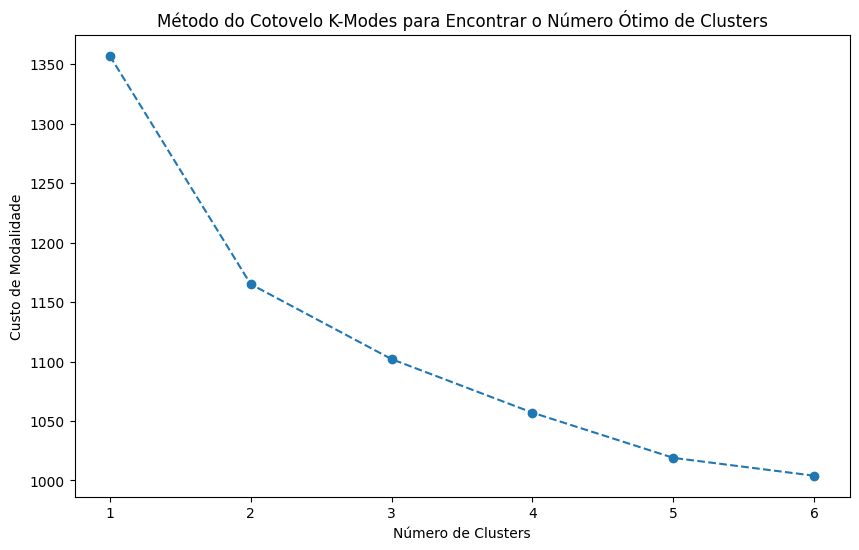

In [ ]:
def calculate_mode_cost(data, n_clusters):

    kmodes = KModes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=0, random_state=42)
    kmodes.fit(data)
    return kmodes.cost_

mode_costs = []

max_clusters = 6  # de acordo com seu problema

for n_clusters in range(1, max_clusters + 1):
    mode_costs.append(calculate_mode_cost(df1, n_clusters))

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), mode_costs, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Custo de Modalidade')
plt.title('Método do Cotovelo K-Modes para Encontrar o Número Ótimo de Clusters')
plt.show()


Preparando dados e Treinando o modelo

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data1 = df1.apply(le.fit_transform)
data1.head()

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25
1,4,4,2,2,2,2,4,4,2,2,...,2,1,1,3,2,2,2,2,2,2
2,4,4,4,3,4,3,4,4,1,2,...,3,2,4,4,3,2,4,4,2,2
3,3,4,3,2,3,3,4,3,2,3,...,1,0,1,1,2,4,3,2,2,3
4,4,4,2,2,4,3,4,4,2,3,...,2,0,0,2,2,4,4,2,2,2
5,3,3,2,2,3,3,3,4,2,2,...,2,2,1,1,1,2,3,2,1,2


In [ ]:
data1.shape

(99, 25)

In [ ]:
from kmodes.kmodes import KModes

km_df1 = KModes(n_clusters=3, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_df1.fit_predict(data1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 21, cost: 1193.0
Run 1, iteration: 2/100, moves: 10, cost: 1185.0
Run 1, iteration: 3/100, moves: 1, cost: 1185.0


Resultados do treinamento

In [ ]:
fitClusters_huang

array([2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0], dtype=uint16)

In [ ]:
n = 0

contagem = np.count_nonzero(fitClusters_huang == n)
contagem = np.sum(fitClusters_huang == n)

contagem

48

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_df1.cluster_centroids_)
clusterCentroidsDf.columns = data1.columns

In [ ]:
clusterCentroidsDf # centróides

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25
0,4,4,2,4,4,3,4,4,2,2,...,3,0,0,4,3,4,4,2,2,4
1,4,4,3,3,4,3,4,4,3,3,...,3,1,1,3,1,4,4,1,3,4
2,4,4,4,3,4,3,4,4,1,4,...,2,1,1,1,1,4,4,2,2,4


Juntando os dataframes para visualizar os clusters em função das outras colunas

In [ ]:
data_df1 = df1.reset_index()

In [ ]:
clustersDf = pd.DataFrame(fitClusters_huang)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([data_df1, clustersDf, comunidades], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [ ]:
clustersDf

,cluster_predicted
0,2
1,0
2,0
3,0
4,2
...,...
94,0
95,0
96,0
97,0


In [ ]:
column = eixo_1['Comunidades']
clustersDf['Comunidades'] = column
clustersDf

,cluster_predicted,Comunidades
0,2,Curiau
1,0,Curiau
2,0,Curiau
3,0,Curiau
4,2,Curiau
...,...,...
94,0,Tembé
95,0,Tembé
96,0,Tembé
97,0,Tembé


Dataframe completo

In [ ]:
combinedDf.head()

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P18,P19,P20,P21,P22,P23,P24,P25,cluster_predicted,Comunidades
0,5,5,3,3,3,4,5,5,3,3,...,2,4,3,3,3,3,3,3,2,Curiau
1,5,5,5,4,5,5,5,5,2,3,...,5,5,4,3,5,5,3,3,0,Curiau
2,4,5,4,3,4,5,5,4,3,4,...,2,2,3,5,4,3,3,4,0,Curiau
3,5,5,3,3,5,5,5,5,3,4,...,1,3,3,5,5,3,3,3,0,Curiau
4,4,4,3,3,4,5,4,5,3,3,...,2,2,2,3,4,3,2,3,2,Curiau


Visualizando os clusters

In [ ]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]

In [ ]:
c0 = cluster_0['Comunidades'].value_counts()
c0

Curiau         19
Amazonas       12
Satantarém      5
Tembé           5
Oiapoque        4
São Caetano     3
Name: Comunidades, dtype: int64

In [ ]:
c1 = cluster_1['Comunidades'].value_counts()
c1

São Caetano    10
Satantarém      9
Amazonas        6
Curiau          4
Oiapoque        2
Name: Comunidades, dtype: int64

In [ ]:
c2 = cluster_2['Comunidades'].value_counts()
c2

Amazonas      9
Curiau        7
Oiapoque      2
Satantarém    1
Tembé         1
Name: Comunidades, dtype: int64

Distribuição das comunidades sobre os clusters

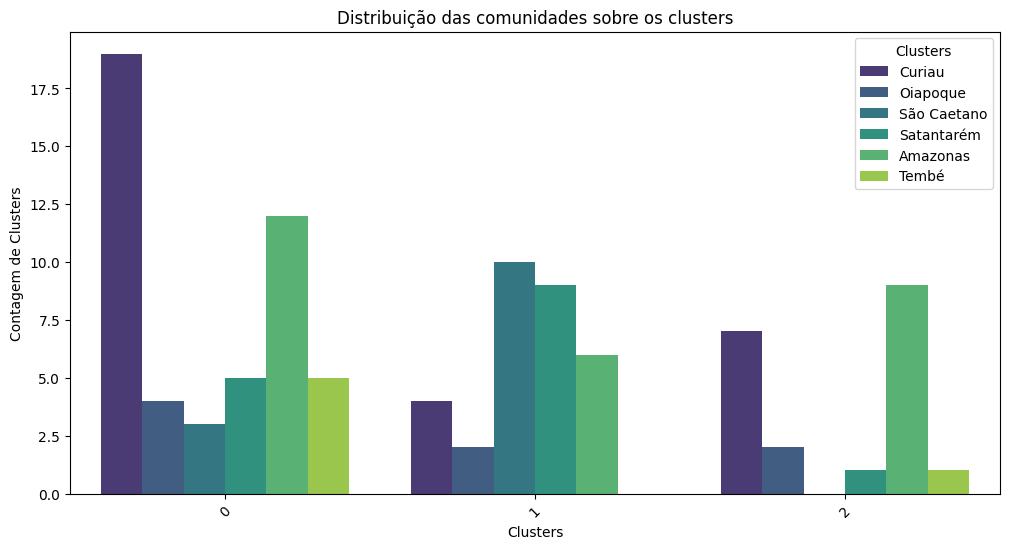

In [ ]:
import seaborn as sns

# Crie um gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=clustersDf, hue='Comunidades', x='cluster_predicted', palette='viridis')
plt.xticks(rotation=45)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('Clusters')
plt.ylabel('Contagem de Clusters')
plt.title('Distribuição das comunidades sobre os clusters')
plt.legend(title='Clusters')
plt.show()

<ipython-input-139-193aa0f04a38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alimentacao_df['cluster_predicted'] = combinedDf['cluster_predicted']
<ipython-input-139-193aa0f04a38>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moradia_df['cluster_predicted'] = combinedDf['cluster_predicted']
<ipython-input-139-193aa0f04a38>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

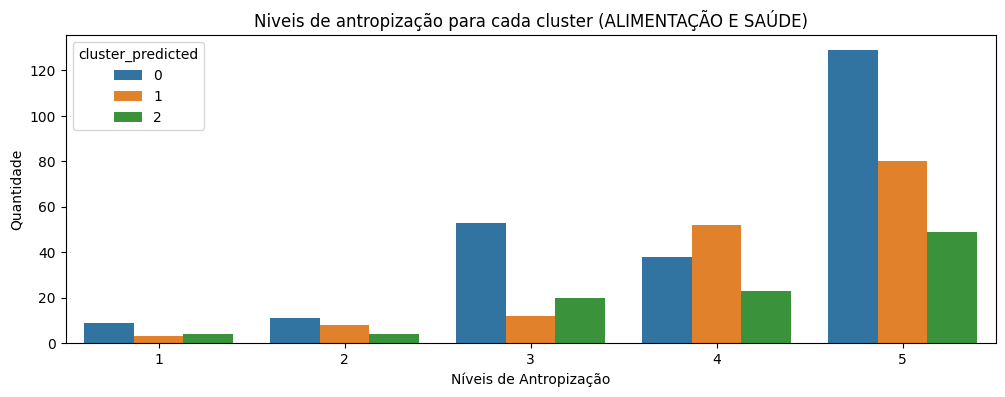

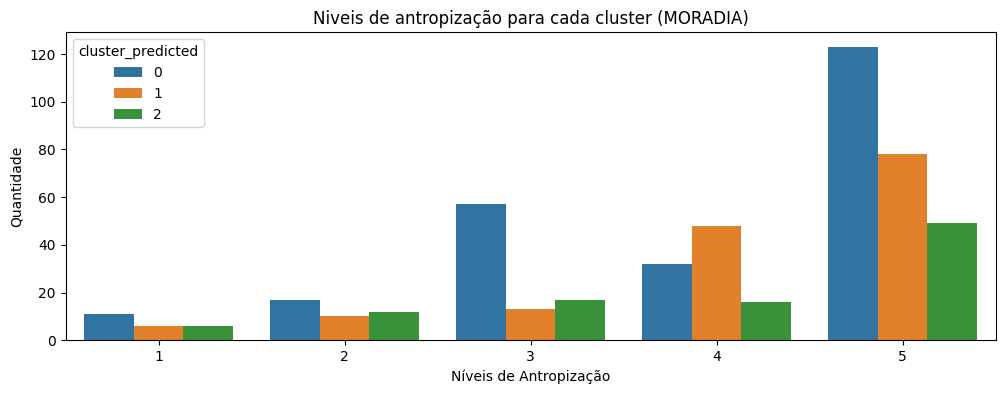

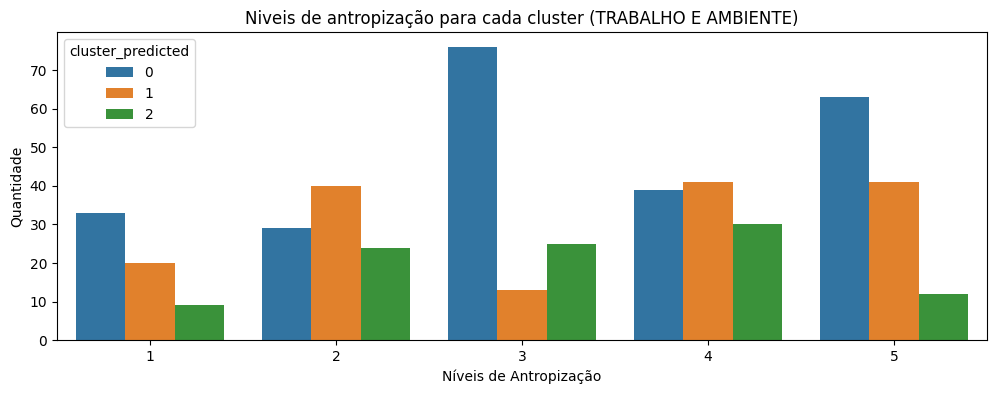

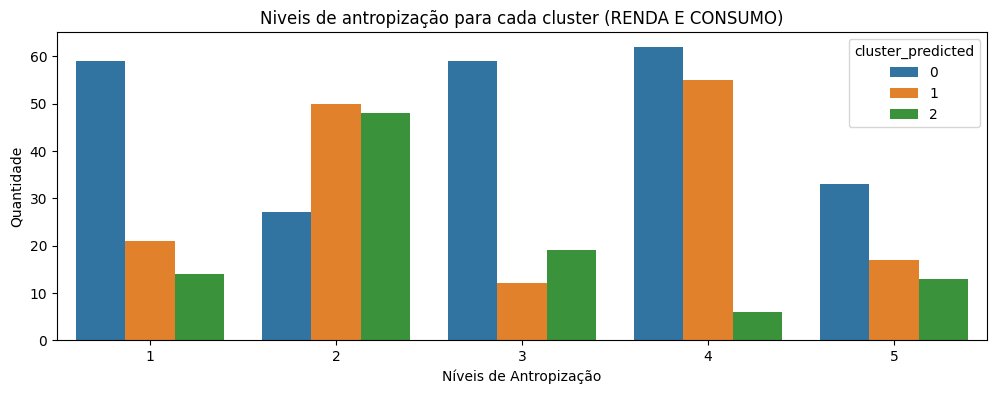

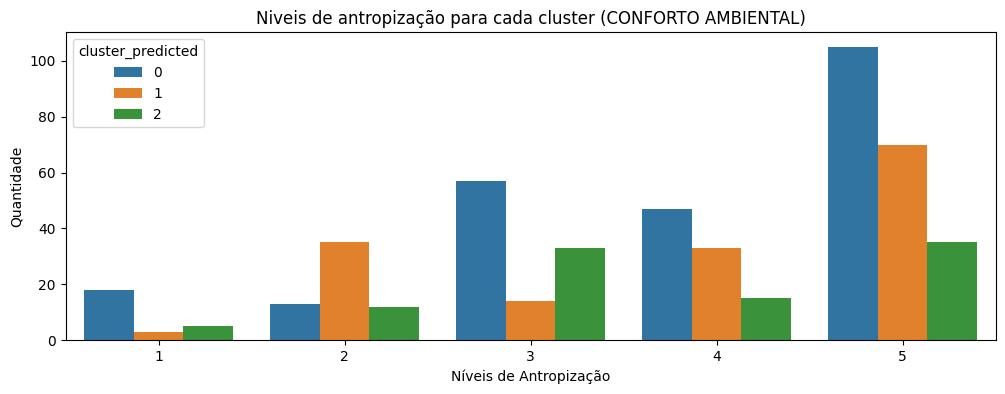

In [ ]:
alimentacao = ['P01', 'P02', 'P03', 'P04', 'P05']
alimentacao_df = combinedDf[alimentacao]
alimentacao_df['cluster_predicted'] = combinedDf['cluster_predicted']
alimentacao_df = pd.melt(alimentacao_df, id_vars=['cluster_predicted'], var_name='Coluna', value_name='Valores')

moradia = ['P06', 'P07', 'P08', 'P09', 'P10']
moradia_df = combinedDf[moradia]
moradia_df['cluster_predicted'] = combinedDf['cluster_predicted']
moradia_df = pd.melt(moradia_df, id_vars=['cluster_predicted'], var_name='Coluna', value_name='Valores')

trabalho = ['P11', 'P12', 'P13', 'P14', 'P15']
trabalho_df = combinedDf[trabalho]
trabalho_df['cluster_predicted'] = combinedDf['cluster_predicted']
trabalho_df = pd.melt(trabalho_df, id_vars=['cluster_predicted'], var_name='Coluna', value_name='Valores')

renda_consumo = ['P16', 'P17', 'P18', 'P19', 'P20']
renda_consumo_df = combinedDf[renda_consumo]
renda_consumo_df['cluster_predicted'] = combinedDf['cluster_predicted']
renda_consumo_df = pd.melt(renda_consumo_df, id_vars=['cluster_predicted'], var_name='Coluna', value_name='Valores')

conforto_ambiental = ['P21', 'P22', 'P23', 'P24', 'P25']
conforto_ambiental_df = combinedDf[conforto_ambiental]
conforto_ambiental_df['cluster_predicted'] = combinedDf['cluster_predicted']
conforto_ambiental_df = pd.melt(conforto_ambiental_df, id_vars=['cluster_predicted'], var_name='Coluna', value_name='Valores')

# Plotar o countplot
plt.figure(figsize=(12, 4))
sns.countplot(data=alimentacao_df, x='Valores', hue='cluster_predicted')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (ALIMENTAÇÃO E SAÚDE)')

plt.figure(figsize=(12, 4))
sns.countplot(data=moradia_df, x='Valores', hue='cluster_predicted')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (MORADIA)')

plt.figure(figsize=(12, 4))
sns.countplot(data=trabalho_df, x='Valores', hue='cluster_predicted')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (TRABALHO E AMBIENTE)')

plt.figure(figsize=(12, 4))
sns.countplot(data=renda_consumo_df, x='Valores', hue='cluster_predicted')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (RENDA E CONSUMO)')

plt.figure(figsize=(12, 4))
sns.countplot(data=conforto_ambiental_df, x='Valores', hue='cluster_predicted')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (CONFORTO AMBIENTAL)')

plt.show()

### Utilizar MULTIPLE CORRESPONDENCE ANALYSIS (MCA)

In [ ]:
!pip install mca

  Preparing metadata (setup.py) ... done
  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6010 sha256=135d922d65884e1a9857feee24d847a328b13ccfa2c61b21b95fcfd605620ff3
  Stored in directory: /root/.cache/pip/wheels/41/3c/28/32383be9777008d3318b6e787b89273ca4a6c6c915ce9bd1f3
Successfully built mca


In [ ]:
!pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.1/415.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
from prince import MCA

In [ ]:
eixo_1 = eixo_1.reset_index()
eixo_1 = eixo_1.drop('index', axis=1)
eixo_1

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P17,P18,P19,P20,P21,P22,P23,P24,P25,Comunidades
0,5,5,3,3,3,4,5,5,3,3,...,2,2,4,3,3,3,3,3,3,Curiau
1,5,5,5,4,5,5,5,5,2,3,...,3,5,5,4,3,5,5,3,3,Curiau
2,4,5,4,3,4,5,5,4,3,4,...,1,2,2,3,5,4,3,3,4,Curiau
3,5,5,3,3,5,5,5,5,3,4,...,1,1,3,3,5,5,3,3,3,Curiau
4,4,4,3,3,4,5,4,5,3,3,...,3,2,2,2,3,4,3,2,3,Curiau
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,5,5,4,5,5,5,4,4,4,5,...,4,3,5,4,5,5,4,4,5,Tembé
95,5,5,5,5,5,5,5,4,4,5,...,4,4,5,4,5,5,5,4,5,Tembé
96,5,5,4,5,5,5,5,5,3,5,...,4,3,4,4,5,5,5,3,5,Tembé
97,5,4,4,5,5,5,5,4,2,5,...,3,4,4,4,5,5,5,3,5,Tembé


In [ ]:
df1 = df1.reset_index()
df1 = df1.drop('index', axis=1)
df1

,P01,P02,P03,P04,P05,P06,P07,P08,P09,P10,...,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25
0,5,5,3,3,3,4,5,5,3,3,...,3,2,2,4,3,3,3,3,3,3
1,5,5,5,4,5,5,5,5,2,3,...,4,3,5,5,4,3,5,5,3,3
2,4,5,4,3,4,5,5,4,3,4,...,2,1,2,2,3,5,4,3,3,4
3,5,5,3,3,5,5,5,5,3,4,...,3,1,1,3,3,5,5,3,3,3
4,4,4,3,3,4,5,4,5,3,3,...,3,3,2,2,2,3,4,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,5,5,4,5,5,5,4,4,4,5,...,4,4,3,5,4,5,5,4,4,5
95,5,5,5,5,5,5,5,4,4,5,...,4,4,4,5,4,5,5,5,4,5
96,5,5,4,5,5,5,5,5,3,5,...,4,4,3,4,4,5,5,5,3,5
97,5,4,4,5,5,5,5,4,2,5,...,4,3,4,4,4,5,5,5,3,5


In [ ]:
# analisando a ocorrência de pares de categorias em diferentes variáveis.
pd.crosstab(eixo_1.P20, eixo_1.Comunidades)

Comunidades,Amazonas,Curiau,Oiapoque,Satantarém,São Caetano,Tembé
P20,,,,,,
1,6,7,3,6,1,0
2,10,9,3,3,6,1
3,6,8,1,0,0,0
4,2,6,1,6,5,5
5,3,0,0,0,1,0


In [ ]:
mca = MCA(n_components=3)  # Número de dimensões escolhido (pode ser diferente)

# Ajustar a MCA aos dados
mca.fit(eixo_1)

coordenadas_linhas = mca.row_coordinates(eixo_1) # Observações (comunidades)
coordenadas_colunas = mca.column_coordinates(df1) # variáveis (perguntas)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X, columns=X.columns)
/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X, columns=X.columns)
/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X, columns=X.columns)
/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X, columns=X.colum

Analisando a relação das comunidades nas perguntas

In [ ]:
coordenadas_linhas # comunidades

,0,1,2
0,0.642323,-0.547198,0.043533
1,0.110871,-0.075874,-0.443140
2,0.285467,-0.408328,0.374340
3,0.627312,-0.394420,0.067679
4,0.797779,-0.667287,0.323044
...,...,...,...
94,-0.812593,-0.022098,0.268512
95,-0.893599,0.067992,0.022893
96,-0.613019,-0.138306,0.107472
97,-0.628525,-0.109105,0.021960


In [ ]:
comunidades

0     Curiau
1     Curiau
2     Curiau
3     Curiau
4     Curiau
       ...  
94     Tembé
95     Tembé
96     Tembé
97     Tembé
98     Tembé
Name: Comunidades, Length: 99, dtype: object

In [ ]:
concatenated_df = pd.concat([coordenadas_linhas, comunidades], axis=1) # concatenando os dataframes
concatenated_df.columns = ['col1', 'col2', 'col3', 'comunidades'] # nomeando colunas
concatenated_df

,col1,col2,col3,comunidades
0,0.642323,-0.547198,0.043533,Curiau
1,0.110871,-0.075874,-0.443140,Curiau
2,0.285467,-0.408328,0.374340,Curiau
3,0.627312,-0.394420,0.067679,Curiau
4,0.797779,-0.667287,0.323044,Curiau
...,...,...,...,...
94,-0.812593,-0.022098,0.268512,Tembé
95,-0.893599,0.067992,0.022893,Tembé
96,-0.613019,-0.138306,0.107472,Tembé
97,-0.628525,-0.109105,0.021960,Tembé


Visualizando como as comunidades estão relacionadas ou como elas se agrupam com base nas respostas às perguntas.


Separando o dataframe

In [ ]:
df_curiau = concatenated_df.loc[0: 29]
df_oiapoque = concatenated_df.iloc[30:37]
df_saocaetano = concatenated_df.iloc[38:50]
df_santarem = concatenated_df.iloc[51:65]
df_amazonas = concatenated_df.iloc[66:92]
df_tembe = concatenated_df.iloc[93:99]

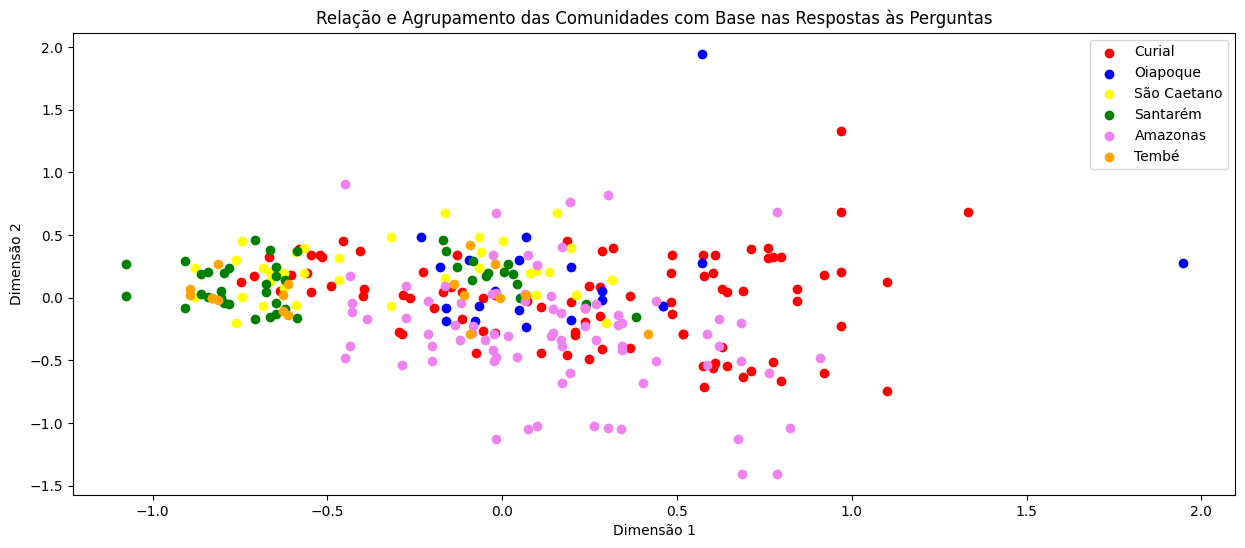

In [ ]:
plt.figure(figsize=(15,6))

plt.scatter(df_curiau['col1'], df_curiau['col2'], color='red', label='Curial')
plt.scatter(df_curiau['col1'], df_curiau['col3'], color='red')
plt.scatter(df_curiau['col2'], df_curiau['col3'], color='red')

plt.scatter(df_oiapoque['col1'], df_oiapoque['col2'], color='blue', label='Oiapoque')
plt.scatter(df_oiapoque['col1'], df_oiapoque['col3'], color='blue')
plt.scatter(df_oiapoque['col2'], df_oiapoque['col3'], color='blue')

plt.scatter(df_saocaetano['col1'], df_saocaetano['col2'], color='yellow', label='São Caetano')
plt.scatter(df_saocaetano['col1'], df_saocaetano['col3'], color='yellow')
plt.scatter(df_saocaetano['col2'], df_saocaetano['col3'], color='yellow')

plt.scatter(df_santarem['col1'], df_santarem['col2'], color='green', label='Santarém')
plt.scatter(df_santarem['col1'], df_santarem['col3'], color='green')
plt.scatter(df_santarem['col2'], df_santarem['col3'], color='green')

plt.scatter(df_amazonas['col1'], df_amazonas['col2'], color='violet', label='Amazonas')
plt.scatter(df_amazonas['col1'], df_amazonas['col3'], color='violet')
plt.scatter(df_amazonas['col2'], df_amazonas['col3'], color='violet')

plt.scatter(df_tembe['col1'], df_tembe['col2'], color='orange', label='Tembé')
plt.scatter(df_tembe['col1'], df_tembe['col3'], color='orange')
plt.scatter(df_tembe['col2'], df_tembe['col3'], color='orange')

plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.title('Relação e Agrupamento das Comunidades com Base nas Respostas às Perguntas')

plt.legend()
plt.show()

Todas as comunidades tem distribuições parecidas, isso por que nas perguntas teve uma maior consideração do conceito 5 em relação aos outros conceitos. Como as respostas dos participantes indicaram uma boa entropização, podemos indicar que essa é a único comportamento padrão existente nos dados. O mesmo fato pode ser visto nos dados clusterizados, onde os clusters, por exemplo, o 3 tem englopa grande parte das comunidades, isso pq ambas apresentaram conceitos e comportamento semelhantes, isto é, conceito 5, com poucas variações.

Analisando a relação das perguntas em relação aos conceitos

In [ ]:
coordenadas_colunas # perguntas

,0,1,2
P01_1,1.879201,4.694952,2.527652
P01_2,-0.282013,0.326923,1.546271
P01_3,1.377146,-0.285028,0.611554
P01_4,0.542111,-0.676357,0.498984
P01_5,-0.321373,0.031745,-0.261525
...,...,...,...
P25_1,0.829336,0.228547,-1.180978
P25_2,0.080784,0.596056,0.357147
P25_3,0.833208,-0.623557,-0.265390
P25_4,0.322093,0.000013,0.451325


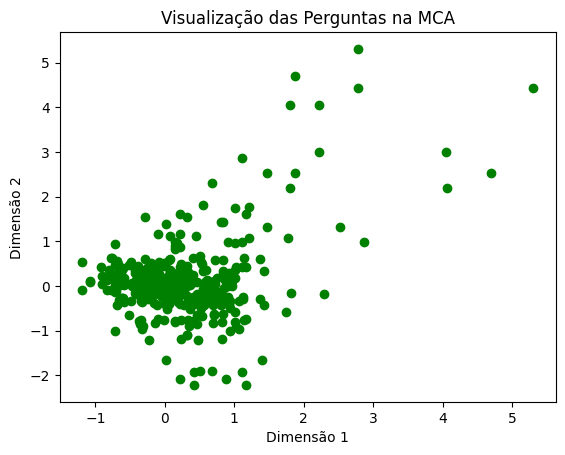

In [ ]:
# Visualizar as coordenadas das colunas (perguntas)
plt.scatter(coordenadas_colunas[0], coordenadas_colunas[1], color='green')
plt.scatter(coordenadas_colunas[0], coordenadas_colunas[2], color='green')
plt.scatter(coordenadas_colunas[1], coordenadas_colunas[2], color='green')

plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.title('Visualização das Perguntas na MCA')
plt.show()

Plot dos pontos das observações (comunidades) e das variáveis (perguntas) nas dimensões principais

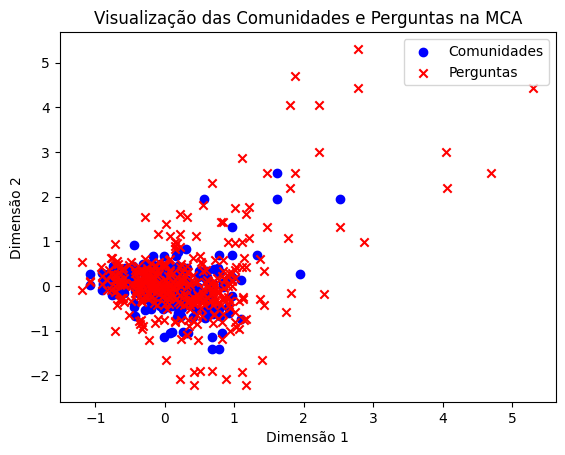

In [ ]:
import matplotlib.pyplot as plt

# Coordenadas das linhas (comunidades)
x_linhas = coordenadas_linhas[0]
y_linhas = coordenadas_linhas[1]
z_linhas = coordenadas_linhas[2]

# Coordenadas das colunas (perguntas)
x_colunas = coordenadas_colunas[0]
y_colunas = coordenadas_colunas[1]
z_colunas = coordenadas_colunas[2]

plt.scatter(x_linhas, y_linhas, label='Comunidades', marker='o', color='blue')
plt.scatter(x_linhas, z_linhas, marker='o', color='blue')
plt.scatter(y_linhas, z_linhas, marker='o', color='blue')

plt.scatter(x_colunas, y_colunas, label='Perguntas', marker='x', color='red')
plt.scatter(x_colunas, z_colunas, marker='x', color='red')
plt.scatter(y_colunas, z_colunas, marker='x', color='red')

plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')

plt.legend()
plt.title('Visualização das Comunidades e Perguntas na MCA')
plt.show()

Motivo da Similaridade nos Dados: Os dados podem mostrar que as observações (comunidades) e as variáveis (perguntas) têm comportamentos ou características semelhantes, o que resulta em uma sobreposição de pontos nas dimensões principais. Isso pode ocorrer quando as respostas das comunidades são consistentes em relação às perguntas. Também indica que os comportamento dos participantes (de diferentes comunidades) foram semelhantes.

Com base na análise dos dados anteriores, podemos concluir que esse comportamento está relacionado ao alto nivel de antropização nas perguntas, isto é, há uma predominância de respostas 5 para todas as perguntas e em todas as comunidades do dataframe.

Verificando a distribuição dos conceitos na tabela

In [ ]:
total_valores_1 = (eixo_1.iloc[:, 1:] == 1).sum().sum()
total_valores_2 = (eixo_1.iloc[:, 1:] == 2).sum().sum()
total_valores_3 = (eixo_1.iloc[:, 1:] == 3).sum().sum()
total_valores_4 = (eixo_1.iloc[:, 1:] == 4).sum().sum()
total_valores_5 = (eixo_1.iloc[:, 1:] == 5).sum().sum()

print(f"Conceito 1: {total_valores_1/2475} do total da tabela")
print(f"Conceito 2: {total_valores_2/2475} do total da tabela")
print(f"Conceito 3: {total_valores_3/2475} do total da tabela")
print(f"Conceito 4: {total_valores_4/2475} do total da tabela")
print(f"Conceito 5: {total_valores_5/2475} do total da tabela")

Conceito 1: 0.08848484848484849 do total da tabela
Conceito 2: 0.13696969696969696 do total da tabela
Conceito 3: 0.1903030303030303 do total da tabela
Conceito 4: 0.2113131313131313 do total da tabela
Conceito 5: 0.3329292929292929 do total da tabela


Como podemos observar, 5 contém a maior distribuição da tabela. Após a redução de dimensionalidade com o MCA, pode ter acontecido de ele encontrar bastante padrões nas respostas de numero 5, 4 e 3 das comunidades, indicando um alto grau de entropização e, portanto, um bom nível de Sobrevivência e necessidades Humanas das comunidades

A partir da observação por eixo, isto é, aglutinando todas as perguntas, os dados e as respostas das comunidades ficaram bastante distribuídas por terem um certeza semelhança nas resposta, com um alto nivel de entropização. Talvez fazer uma análise separada para cada pergunta, conseguiriamos mais detalhes sobre as comunidades em si.

Uma ideia seria analisar as perguntas separadamento, pela sua temática, seguindo a divisão a seguir:

Eixo SOBREVIVÊNCIA/NECESSIDADES HUMANAS

Alimentação e Saúde - Perguntas 1 a 5

Moradia - Perguntas 6 a 10

Trabalho e Ambiente - Perguntas 11 a 15

Renda e Consumo - Perguntas 16 a 20

Conforto Ambiental - Perguntas 21 a 25

### Analisando pelo nicho Renda e Consumo

In [ ]:
nicho_4_full = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidades.xlsx").filter(["P16", "P17", "P18", "P19", "P20", "Comunidades"])
nicho_4_full = nicho_4_full.loc[0:108].reset_index(drop=True)
nicho_4_full

,P16,P17,P18,P19,P20,Comunidades
0,3,2,2,2,2,Curiau
1,3,2,2,4,3,Curiau
2,4,3,5,5,4,Curiau
3,2,1,2,2,3,Curiau
4,3,1,1,3,3,Curiau
...,...,...,...,...,...,...
104,4,4,3,5,4,Tembé
105,4,4,4,5,4,Tembé
106,4,4,3,4,4,Tembé
107,4,3,4,4,4,Tembé


In [ ]:
nicho_4_full.replace('X', pd.NA, inplace=True)
nicho_4_full.dropna(inplace=True)
nicho_4_full = nicho_4_full.reset_index()
nicho_4_full = nicho_4_full.drop('index', axis=1)
nicho_4_full

,P16,P17,P18,P19,P20,Comunidades
0,3,2,2,2,2,Curiau
1,3,2,2,4,3,Curiau
2,4,3,5,5,4,Curiau
3,2,1,2,2,3,Curiau
4,3,1,1,3,3,Curiau
...,...,...,...,...,...,...
97,4,4,3,5,4,Tembé
98,4,4,4,5,4,Tembé
99,4,4,3,4,4,Tembé
100,4,3,4,4,4,Tembé


In [ ]:
nicho_4 = nicho_4_full.drop('Comunidades', axis=1)
nicho_4

,P16,P17,P18,P19,P20
0,3,2,2,2,2
1,3,2,2,4,3
2,4,3,5,5,4
3,2,1,2,2,3
4,3,1,1,3,3
...,...,...,...,...,...
97,4,4,3,5,4
98,4,4,4,5,4
99,4,4,3,4,4
100,4,3,4,4,4


MCA

In [ ]:
mca = MCA(n_components=3)  # Número de dimensões escolhido (pode ser diferente)

# Ajustar a MCA aos dados
mca.fit(nicho_4_full)

coordenadas_linhas = mca.row_coordinates(nicho_4_full) # Observações (comunidades)
coordenadas_colunas = mca.column_coordinates(nicho_4) # variáveis (perguntas)

/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X, columns=X.columns)
/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X, columns=X.columns)
/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X, columns=X.columns)
/usr/local/lib/python3.10/dist-packages/prince/mca.py:37: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X, columns=X.colum

In [ ]:
comu = nicho_4_full['Comunidades']
comu

0      Curiau
1      Curiau
2      Curiau
3      Curiau
4      Curiau
        ...  
97      Tembé
98      Tembé
99      Tembé
100     Tembé
101     Tembé
Name: Comunidades, Length: 102, dtype: object

In [ ]:
concatenated_df = pd.concat([coordenadas_linhas, comu], axis=1) # concatenando os dataframes
concatenated_df.columns = ['col1', 'col2', 'col3', 'comunidades'] # nomeando colunas
concatenated_df

,col1,col2,col3,comunidades
0,-0.671719,-0.778324,0.093408,Curiau
1,-0.491838,-0.750914,-0.273839,Curiau
2,0.416582,0.018619,0.406425,Curiau
3,-0.670016,-0.588571,0.147369,Curiau
4,-0.876450,0.034867,-0.475252,Curiau
...,...,...,...,...
97,1.272878,-0.184426,-0.652450,Tembé
98,1.562521,0.079157,-0.573778,Tembé
99,1.222590,-0.372029,-0.982580,Tembé
100,1.157202,-0.377972,-0.693936,Tembé


Gerar gráfico de 3 dimensões baseados nas colunas 1,2 e 3 com label nas comunidades. Esse gráfico vai mostrar o padrão dos dados em cada comunidade

In [ ]:
df_curiau = concatenated_df.loc[0: 32]
df_oiapoque = concatenated_df.iloc[30:40]
df_saocaetano = concatenated_df.iloc[38:53]
df_santarem = concatenated_df.iloc[51:68]
df_amazonas = concatenated_df.iloc[66:95]
df_tembe = concatenated_df.iloc[93:102]

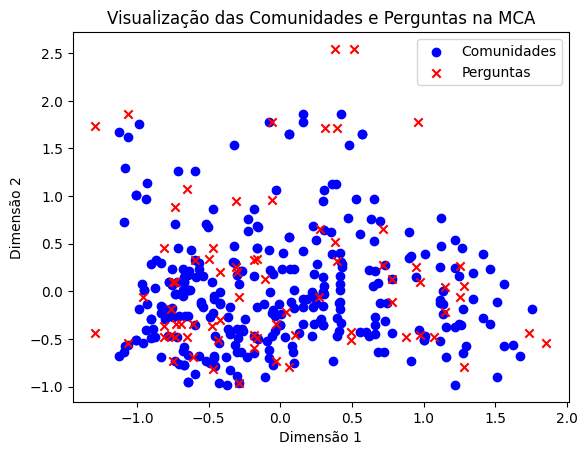

In [ ]:
import matplotlib.pyplot as plt

# Coordenadas das linhas (comunidades)
x_linhas = coordenadas_linhas[0]
y_linhas = coordenadas_linhas[1]
z_linhas = coordenadas_linhas[2]

# Coordenadas das colunas (perguntas)
x_colunas = coordenadas_colunas[0]
y_colunas = coordenadas_colunas[1]
z_colunas = coordenadas_colunas[2]

plt.scatter(x_linhas, y_linhas, label='Comunidades', marker='o', color='blue')
plt.scatter(x_linhas, z_linhas, marker='o', color='blue')
plt.scatter(y_linhas, z_linhas, marker='o', color='blue')

plt.scatter(x_colunas, y_colunas, label='Perguntas', marker='x', color='red')
plt.scatter(x_colunas, z_colunas, marker='x', color='red')
plt.scatter(y_colunas, z_colunas, marker='x', color='red')

plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')

plt.legend()
plt.title('Visualização das Comunidades e Perguntas na MCA')
plt.show()

### Utilizando o Profillies
- https://ydata-profiling.ydata.ai/docs/master/pages/getting_started/overview.html

In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(eixo_1, title="Pandas Profiling Report", explorative=True)

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## CONFLITOS/ CONSEQUENCIAS AMBIENTAIS - Perguntas 26 a 50

### Análise a partir dos clusters


Tratando os dados

In [ ]:
eixo_2 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidades.xlsx").filter(["P26", "P27", "P28", "P29", "P30", "P31", "P32", "P33", "P34", "P35", "P36", "P37", "P38", "P39", "P40", "P41", "P42", "P43", "P44", "P45", "P46", "P47", "P48", "P49", "P50", "Comunidades"])
eixo_2 = eixo_2.loc[0:108].reset_index(drop=True)
eixo_2

,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,...,P42,P43,P44,P45,P46,P47,P48,P49,P50,Comunidades
0,3,3,1,1,4,3,5,3,4,3,...,2,4,5,3,3,3,5,3,3,Curiau
1,3,4,4,3,4,4,4,2,4,3,...,5,3,5,4,4,1,5,3,3,Curiau
2,4,3,4,3,3,4,3,2,4,4,...,3,5,5,3,3,1,2,2,2,Curiau
3,4,3,4,2,2,4,4,3,3,3,...,3,4,5,4,3,3,3,4,3,Curiau
4,3,3,5,1,3,5,5,3,5,5,...,3,5,5,5,5,3,5,5,1,Curiau
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,5,5,5,5,4,5,5,4,4,5,...,3,5,5,4,5,2,5,5,5,Tembé
105,5,5,5,5,3,5,5,4,5,5,...,3,5,5,4,5,2,5,5,4,Tembé
106,5,5,5,4,3,5,5,3,4,5,...,3,5,5,4,5,2,5,5,5,Tembé
107,5,5,5,5,3,5,5,3,4,5,...,2,5,5,5,5,2,5,5,5,Tembé


In [ ]:
eixo_2.replace('X', pd.NA, inplace=True)
eixo_2.dropna(inplace=True)
eixo_2.shape

(103, 26)

In [ ]:
eixo_2 = eixo_2.reset_index()
eixo_2 = eixo_2.drop('index', axis=1)
eixo_2

,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,...,P42,P43,P44,P45,P46,P47,P48,P49,P50,Comunidades
0,3,3,1,1,4,3,5,3,4,3,...,2,4,5,3,3,3,5,3,3,Curiau
1,3,4,4,3,4,4,4,2,4,3,...,5,3,5,4,4,1,5,3,3,Curiau
2,4,3,4,3,3,4,3,2,4,4,...,3,5,5,3,3,1,2,2,2,Curiau
3,4,3,4,2,2,4,4,3,3,3,...,3,4,5,4,3,3,3,4,3,Curiau
4,3,3,5,1,3,5,5,3,5,5,...,3,5,5,5,5,3,5,5,1,Curiau
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,5,5,5,5,4,5,5,4,4,5,...,3,5,5,4,5,2,5,5,5,Tembé
99,5,5,5,5,3,5,5,4,5,5,...,3,5,5,4,5,2,5,5,4,Tembé
100,5,5,5,4,3,5,5,3,4,5,...,3,5,5,4,5,2,5,5,5,Tembé
101,5,5,5,5,3,5,5,3,4,5,...,2,5,5,5,5,2,5,5,5,Tembé


Separandos os dados das comunidades

In [ ]:
comunidades = eixo_2['Comunidades']
comunidades.reset_index(drop=True, inplace=True)
comunidades

0      Curiau
1      Curiau
2      Curiau
3      Curiau
4      Curiau
        ...  
98      Tembé
99      Tembé
100     Tembé
101     Tembé
102     Tembé
Name: Comunidades, Length: 103, dtype: object

In [ ]:
df2 = eixo_2.drop('Comunidades', axis=1)
df2

,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,...,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50
0,3,3,1,1,4,3,5,3,4,3,...,3,2,4,5,3,3,3,5,3,3
1,3,4,4,3,4,4,4,2,4,3,...,4,5,3,5,4,4,1,5,3,3
2,4,3,4,3,3,4,3,2,4,4,...,3,3,5,5,3,3,1,2,2,2
3,4,3,4,2,2,4,4,3,3,3,...,3,3,4,5,4,3,3,3,4,3
4,3,3,5,1,3,5,5,3,5,5,...,3,3,5,5,5,5,3,5,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,5,5,5,5,4,5,5,4,4,5,...,4,3,5,5,4,5,2,5,5,5
99,5,5,5,5,3,5,5,4,5,5,...,4,3,5,5,4,5,2,5,5,4
100,5,5,5,4,3,5,5,3,4,5,...,4,3,5,5,4,5,2,5,5,5
101,5,5,5,5,3,5,5,3,4,5,...,3,2,5,5,5,5,2,5,5,5


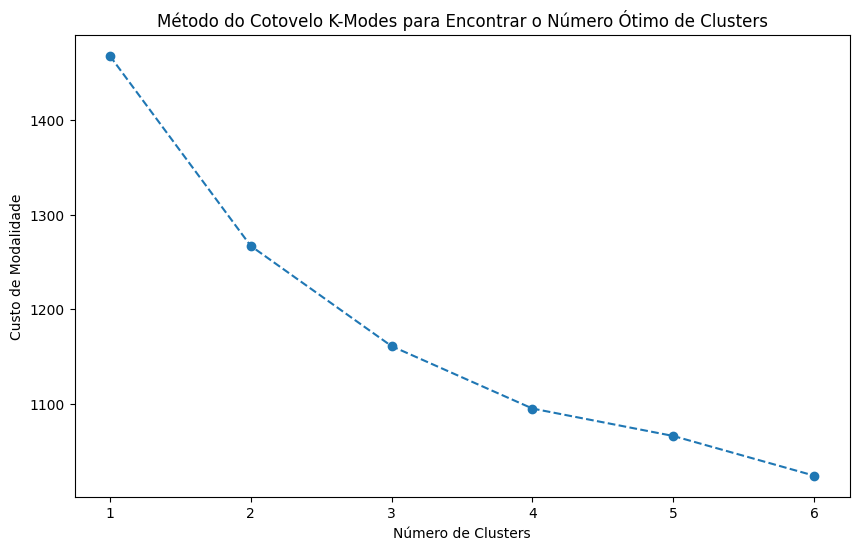

In [ ]:
def calculate_mode_cost(data, n_clusters):

    kmodes = KModes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=0, random_state=42)
    kmodes.fit(data)
    return kmodes.cost_

mode_costs = []

max_clusters = 6  # de acordo com seu problema

for n_clusters in range(1, max_clusters + 1):
    mode_costs.append(calculate_mode_cost(df2, n_clusters))

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), mode_costs, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Custo de Modalidade')
plt.title('Método do Cotovelo K-Modes para Encontrar o Número Ótimo de Clusters')
plt.show()


Preparando dados

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data2 = df2.apply(le.fit_transform)
data2.head()

,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,...,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50
0,2,2,0,0,3,2,4,2,3,2,...,2,1,3,4,2,2,2,4,2,2
1,2,3,3,2,3,3,3,1,3,2,...,3,4,2,4,3,3,0,4,2,2
2,3,2,3,2,2,3,2,1,3,3,...,2,2,4,4,2,2,0,1,1,1
3,3,2,3,1,1,3,3,2,2,2,...,2,2,3,4,3,2,2,2,3,2
4,2,2,4,0,2,4,4,2,4,4,...,2,2,4,4,4,4,2,4,4,0


In [ ]:
from kmodes.kmodes import KModes

km_df2 = KModes(n_clusters=3, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_df2.fit_predict(data2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 25, cost: 1171.0
Run 1, iteration: 2/100, moves: 10, cost: 1164.0
Run 1, iteration: 3/100, moves: 0, cost: 1164.0


In [ ]:
fitClusters_huang

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 0, 2,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0], dtype=uint16)

Centróides

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_df2.cluster_centroids_)
clusterCentroidsDf.columns = data2.columns
clusterCentroidsDf

,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,...,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50
0,4,4,4,4,4,4,4,2,2,2,...,4,2,4,4,2,4,0,4,4,4
1,2,2,4,2,2,3,3,2,2,2,...,2,2,4,4,2,2,2,2,2,1
2,3,4,4,3,1,4,4,3,1,1,...,4,3,1,4,3,4,3,4,3,3


In [ ]:
clustersDf = pd.DataFrame(fitClusters_huang)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df2, clustersDf, comunidades], axis = 1).reset_index()


In [ ]:
clustersDf

,cluster_predicted
0,1
1,1
2,1
3,1
4,1
...,...
98,0
99,0
100,0
101,0


In [ ]:
column = eixo_2['Comunidades']
clustersDf['Comunidades'] = column
clustersDf

,cluster_predicted,Comunidades
0,1,Curiau
1,1,Curiau
2,1,Curiau
3,1,Curiau
4,1,Curiau
...,...,...
98,0,Tembé
99,0,Tembé
100,0,Tembé
101,0,Tembé


Dataframe Completo

In [ ]:
combinedDf = combinedDf.drop('index', axis=1)
combinedDf.head()

,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,...,P43,P44,P45,P46,P47,P48,P49,P50,cluster_predicted,Comunidades
0,3,3,1,1,4,3,5,3,4,3,...,4,5,3,3,3,5,3,3,1,Curiau
1,3,4,4,3,4,4,4,2,4,3,...,3,5,4,4,1,5,3,3,1,Curiau
2,4,3,4,3,3,4,3,2,4,4,...,5,5,3,3,1,2,2,2,1,Curiau
3,4,3,4,2,2,4,4,3,3,3,...,4,5,4,3,3,3,4,3,1,Curiau
4,3,3,5,1,3,5,5,3,5,5,...,5,5,5,5,3,5,5,1,1,Curiau


Visualizando clusters

In [ ]:
cluster_0_2 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1_2 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2_2 = combinedDf[combinedDf['cluster_predicted'] == 2]

In [ ]:
c0 = cluster_0_2['Comunidades'].value_counts()
c0

Amazonas    17
Curiau      12
Oiapoque     8
Tembé        5
Name: Comunidades, dtype: int64

In [ ]:
c1 = cluster_1_2['Comunidades'].value_counts()
c1

Curiau      21
Amazonas     5
Oiapoque     1
Name: Comunidades, dtype: int64

In [ ]:
c2 = cluster_2_2['Comunidades'].value_counts()
c2

Satantarém     15
São Caetano    13
Amazonas        5
Tembé           1
Name: Comunidades, dtype: int64

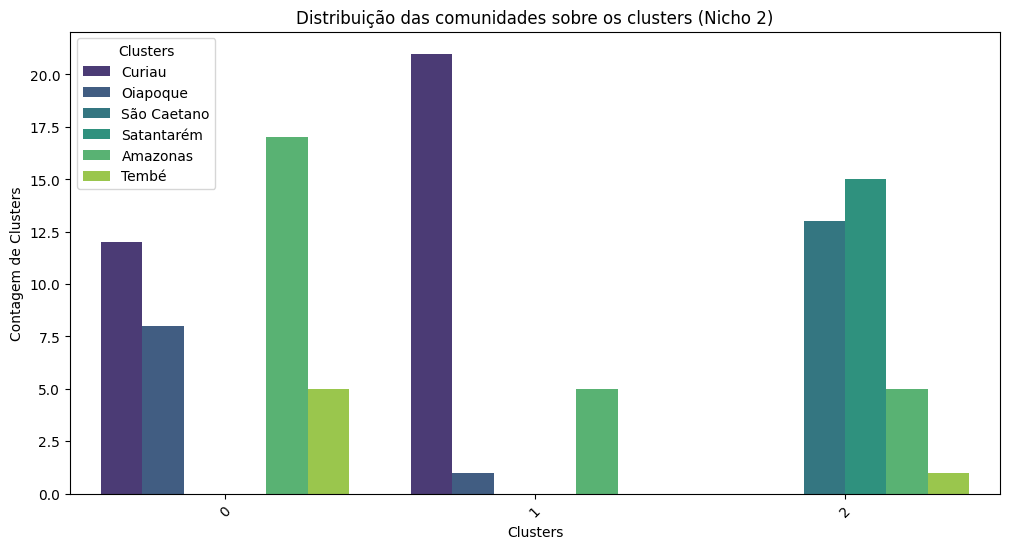

In [ ]:
import seaborn as sns

# Crie um gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=clustersDf, hue='Comunidades', x='cluster_predicted', palette='viridis')
plt.xticks(rotation=45)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('Clusters')
plt.ylabel('Contagem de Clusters')
plt.title('Distribuição das comunidades sobre os clusters (Nicho 2)')
plt.legend(title='Clusters')
plt.show()

<ipython-input-85-ae4b4a5118f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bioindicadores_df['cluster_predicted'] = combinedDf['cluster_predicted']
<ipython-input-85-ae4b4a5118f7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geoindicadores_df['cluster_predicted'] = combinedDf['cluster_predicted']
<ipython-input-85-ae4b4a5118f7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

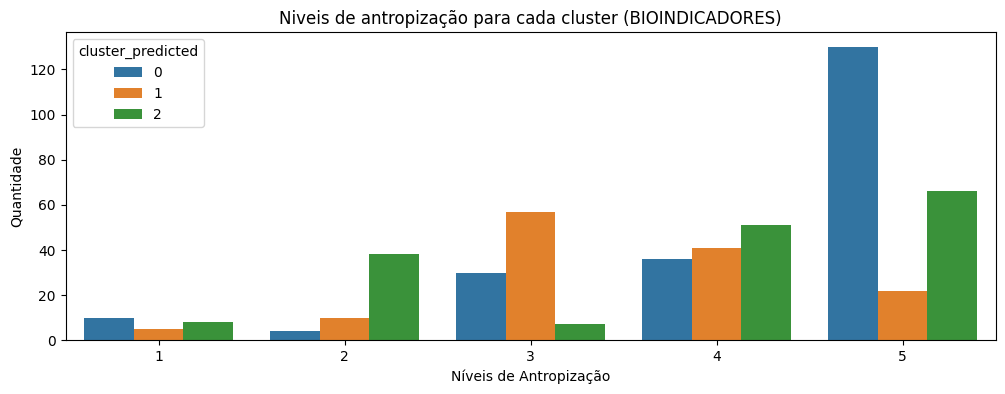

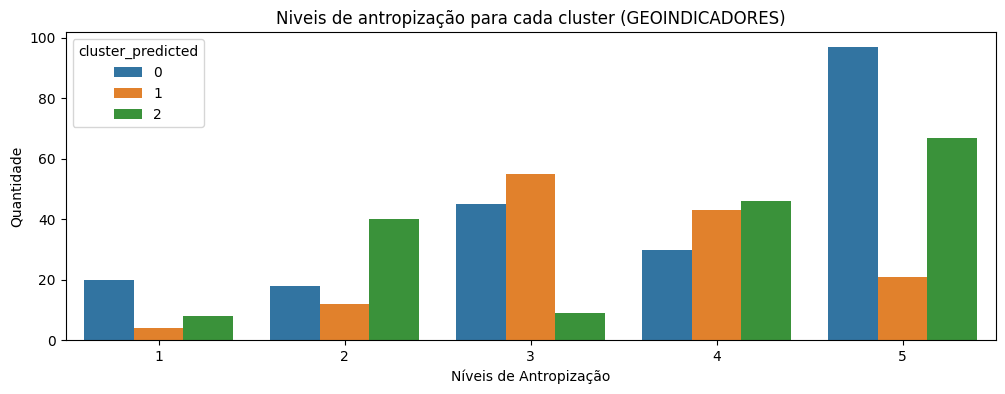

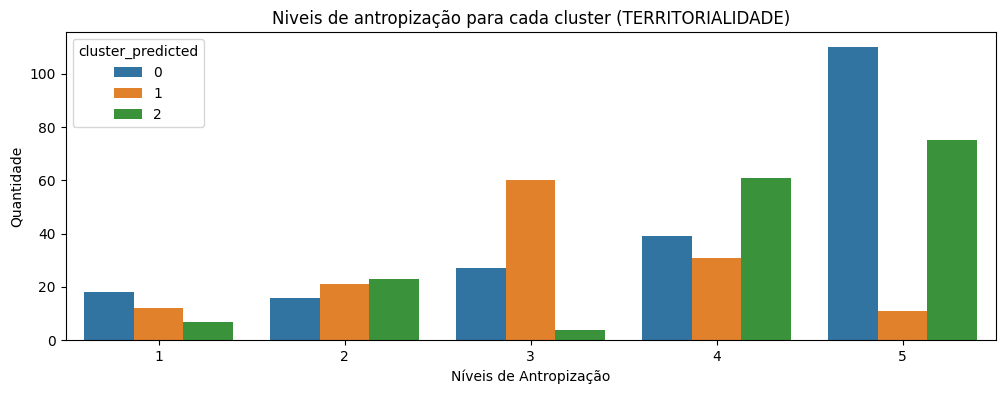

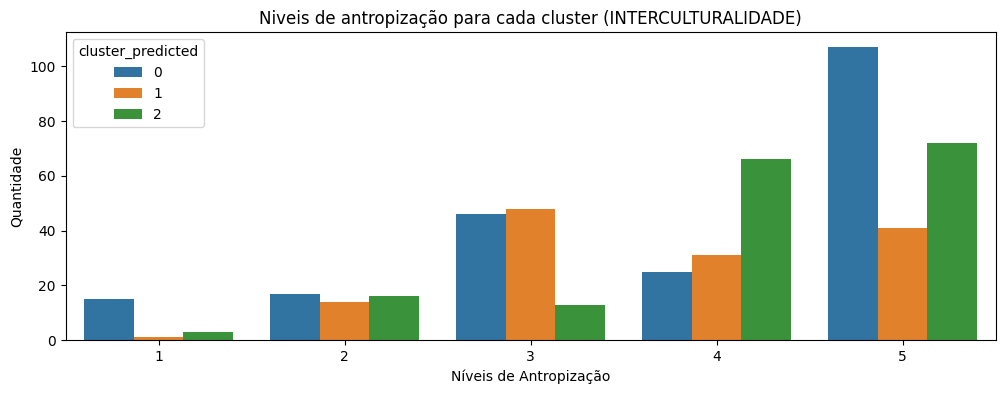

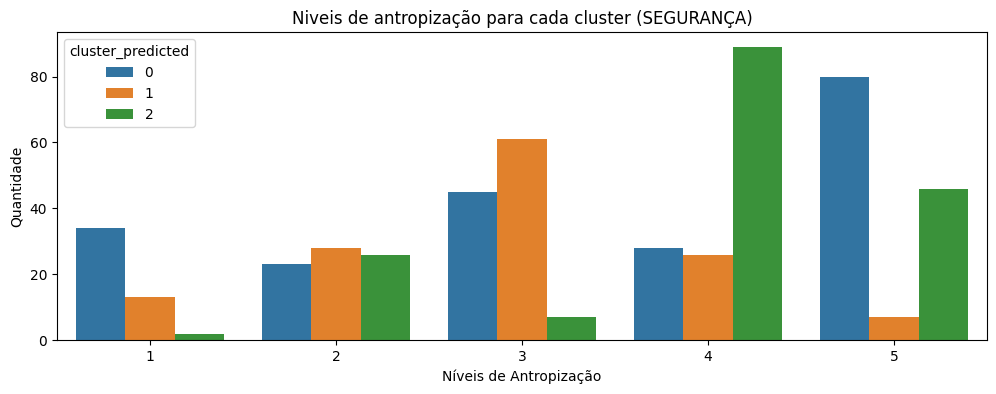

In [ ]:
bioindicadores = ['P26', 'P27', 'P28', 'P29', 'P30']
bioindicadores_df = combinedDf[bioindicadores]
bioindicadores_df['cluster_predicted'] = combinedDf['cluster_predicted']
bioindicadores_df = pd.melt(bioindicadores_df, id_vars=['cluster_predicted'], var_name='Coluna', value_name='Valores')

geoindicadores = ['P31', 'P32', 'P33', 'P34', 'P35']
geoindicadores_df = combinedDf[geoindicadores]
geoindicadores_df['cluster_predicted'] = combinedDf['cluster_predicted']
geoindicadores_df = pd.melt(geoindicadores_df, id_vars=['cluster_predicted'], var_name='Coluna', value_name='Valores')

territorialidade = ['P36', 'P37', 'P38', 'P39', 'P40']
territorialidade_df = combinedDf[territorialidade]
territorialidade_df['cluster_predicted'] = combinedDf['cluster_predicted']
territorialidade_df = pd.melt(territorialidade_df, id_vars=['cluster_predicted'], var_name='Coluna', value_name='Valores')

interculturalidade = ['P41', 'P42', 'P43', 'P44', 'P45']
interculturalidade_df = combinedDf[interculturalidade]
interculturalidade_df['cluster_predicted'] = combinedDf['cluster_predicted']
interculturalidade_df = pd.melt(interculturalidade_df, id_vars=['cluster_predicted'], var_name='Coluna', value_name='Valores')

seguranca = ['P46', 'P47', 'P48', 'P49', 'P50']
seguranca_df = combinedDf[seguranca]
seguranca_df['cluster_predicted'] = combinedDf['cluster_predicted']
seguranca_df = pd.melt(seguranca_df, id_vars=['cluster_predicted'], var_name='Coluna', value_name='Valores')

# Plotar o countplot
plt.figure(figsize=(12, 4))
sns.countplot(data=bioindicadores_df, x='Valores', hue='cluster_predicted')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (BIOINDICADORES)')

plt.figure(figsize=(12, 4))
sns.countplot(data=geoindicadores_df, x='Valores', hue='cluster_predicted')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (GEOINDICADORES)')

plt.figure(figsize=(12, 4))
sns.countplot(data=territorialidade_df, x='Valores', hue='cluster_predicted')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (TERRITORIALIDADE)')

plt.figure(figsize=(12, 4))
sns.countplot(data=interculturalidade_df, x='Valores', hue='cluster_predicted')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (INTERCULTURALIDADE)')

plt.figure(figsize=(12, 4))
sns.countplot(data=seguranca_df, x='Valores', hue='cluster_predicted')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (SEGURANÇA)')

plt.show()

## SUSTENTABILIDADE/BOM VIVER - perguntas 51 a 75

In [ ]:
eixo_3 = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidades.xlsx").filter(["P51", "P52", "P53", "P54", "P55", "P56", "P57", "P58", "P59", "P60", "P61", "P62", "P63", "P64", "P65", "P66", "P67", "P68", "P69", "P70", "P71", "P72", "P73", "P74", "P75", "Comunidades"])
eixo_3 = eixo_3.loc[0:108].reset_index(drop=True)
eixo_3

In [ ]:
eixo_3.replace('X', pd.NA, inplace=True)
eixo_3.dropna(inplace=True)

In [ ]:
eixo_3 = eixo_3.reset_index()
eixo_3 = eixo_3.drop('index', axis=1)
eixo_3

,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,...,P67,P68,P69,P70,P71,P72,P73,P74,P75,Comunidades
0,3,3,4,4,4,3,3,2,3,5,...,3,3,3,3,3,5,3,2,4,Curiau
1,4,5,5,5,4,4,5,3,3,4,...,3,4,2,2,2,5,3,4,3,Curiau
2,2,3,4,4,4,3,4,3,3,3,...,3,2,3,4,2,1,3,3,3,Curiau
3,5,5,5,1,5,5,5,5,3,1,...,5,5,5,3,5,5,5,5,3,Curiau
4,5,3,3,5,4,3,4,3,3,3,...,3,4,3,4,3,4,3,3,4,Curiau
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,5,4,5,5,5,5,5,4,5,3,...,3,5,5,5,5,5,5,5,4,Tembé
98,5,5,5,5,5,5,5,4,5,4,...,3,5,5,5,5,5,5,5,3,Tembé
99,5,5,5,5,5,5,5,4,5,2,...,3,5,5,5,5,5,5,5,3,Tembé
100,5,4,5,5,5,5,5,4,5,2,...,3,5,5,5,5,5,5,5,3,Tembé


In [ ]:
comunidades = eixo_3['Comunidades']
comunidades.reset_index(drop=True, inplace=True)
comunidades

0      Curiau
1      Curiau
2      Curiau
3      Curiau
4      Curiau
        ...  
97      Tembé
98      Tembé
99      Tembé
100     Tembé
101     Tembé
Name: Comunidades, Length: 102, dtype: object

In [ ]:
df3 = eixo_3.drop('Comunidades', axis=1)
df3

,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,...,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75
0,3,3,4,4,4,3,3,2,3,5,...,3,3,3,3,3,3,5,3,2,4
1,4,5,5,5,4,4,5,3,3,4,...,2,3,4,2,2,2,5,3,4,3
2,2,3,4,4,4,3,4,3,3,3,...,3,3,2,3,4,2,1,3,3,3
3,5,5,5,1,5,5,5,5,3,1,...,3,5,5,5,3,5,5,5,5,3
4,5,3,3,5,4,3,4,3,3,3,...,4,3,4,3,4,3,4,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,5,4,5,5,5,5,5,4,5,3,...,4,3,5,5,5,5,5,5,5,4
98,5,5,5,5,5,5,5,4,5,4,...,3,3,5,5,5,5,5,5,5,3
99,5,5,5,5,5,5,5,4,5,2,...,3,3,5,5,5,5,5,5,5,3
100,5,4,5,5,5,5,5,4,5,2,...,3,3,5,5,5,5,5,5,5,3


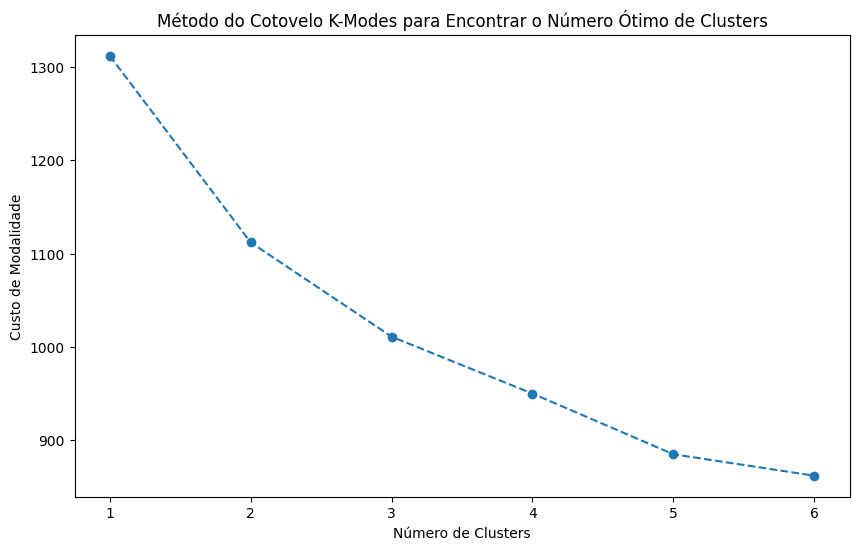

In [ ]:
def calculate_mode_cost(data, n_clusters):

    kmodes = KModes(n_clusters=n_clusters, init='Huang', n_init=5, verbose=0, random_state=42)
    kmodes.fit(data)
    return kmodes.cost_

mode_costs = []

max_clusters = 6  # de acordo com seu problema

for n_clusters in range(1, max_clusters + 1):
    mode_costs.append(calculate_mode_cost(df3, n_clusters))

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), mode_costs, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Custo de Modalidade')
plt.title('Método do Cotovelo K-Modes para Encontrar o Número Ótimo de Clusters')
plt.show()


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data3 = df3.apply(le.fit_transform)
data3.head()

,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,...,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75
0,2,2,3,3,3,2,2,1,2,4,...,2,2,2,2,2,2,4,2,1,3
1,3,4,4,4,3,3,4,2,2,3,...,1,2,3,1,1,1,4,2,3,2
2,1,2,3,3,3,2,3,2,2,2,...,2,2,1,2,3,1,0,2,2,2
3,4,4,4,0,4,4,4,4,2,0,...,2,4,4,4,2,4,4,4,4,2
4,4,2,2,4,3,2,3,2,2,2,...,3,2,3,2,3,2,3,2,2,3


In [ ]:
from kmodes.kmodes import KModes

km_df3 = KModes(n_clusters=3, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_df3.fit_predict(data3)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16, cost: 1012.0
Run 1, iteration: 2/100, moves: 5, cost: 1011.0
Run 1, iteration: 3/100, moves: 1, cost: 1011.0


In [ ]:
fitClusters_huang

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint16)

Centróides

In [ ]:
clusterCentroidsDf = pd.DataFrame(km_df3.cluster_centroids_)
clusterCentroidsDf.columns = data3.columns
clusterCentroidsDf

,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,...,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75
0,4,4,4,4,4,4,4,4,4,0,...,2,2,4,4,4,4,4,4,4,2
1,4,2,3,4,3,2,4,2,2,2,...,2,2,3,2,2,2,3,2,2,2
2,4,4,4,3,4,4,4,3,1,0,...,3,3,1,1,4,1,1,3,3,0


In [ ]:
clustersDf = pd.DataFrame(fitClusters_huang)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df3, clustersDf, comunidades], axis = 1).reset_index()

In [ ]:
column = eixo_3['Comunidades']
clustersDf['Comunidades'] = column
clustersDf

,cluster_predicted,Comunidades
0,1,Curiau
1,1,Curiau
2,1,Curiau
3,0,Curiau
4,1,Curiau
...,...,...
97,0,Tembé
98,0,Tembé
99,0,Tembé
100,0,Tembé


Dataframe Completo

In [ ]:
combinedDf = combinedDf.drop('index', axis=1)
combinedDf.head()

,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,...,P68,P69,P70,P71,P72,P73,P74,P75,cluster_predicted,Comunidades
0,3,3,4,4,4,3,3,2,3,5,...,3,3,3,3,5,3,2,4,1,Curiau
1,4,5,5,5,4,4,5,3,3,4,...,4,2,2,2,5,3,4,3,1,Curiau
2,2,3,4,4,4,3,4,3,3,3,...,2,3,4,2,1,3,3,3,1,Curiau
3,5,5,5,1,5,5,5,5,3,1,...,5,5,3,5,5,5,5,3,0,Curiau
4,5,3,3,5,4,3,4,3,3,3,...,4,3,4,3,4,3,3,4,1,Curiau


In [ ]:
cluster_0_3 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1_3 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2_3 = combinedDf[combinedDf['cluster_predicted'] == 2]

In [ ]:
c0 = cluster_0_3['Comunidades'].value_counts()
c0

Curiau      13
Amazonas    13
Oiapoque     8
Tembé        6
Name: Comunidades, dtype: int64

In [ ]:
c1 = cluster_1_3['Comunidades'].value_counts()
c1

Curiau      19
Amazonas     5
Oiapoque     1
Name: Comunidades, dtype: int64

In [ ]:
c2 = cluster_2_3['Comunidades'].value_counts()
c2

Satantarém     15
São Caetano    13
Amazonas        9
Name: Comunidades, dtype: int64

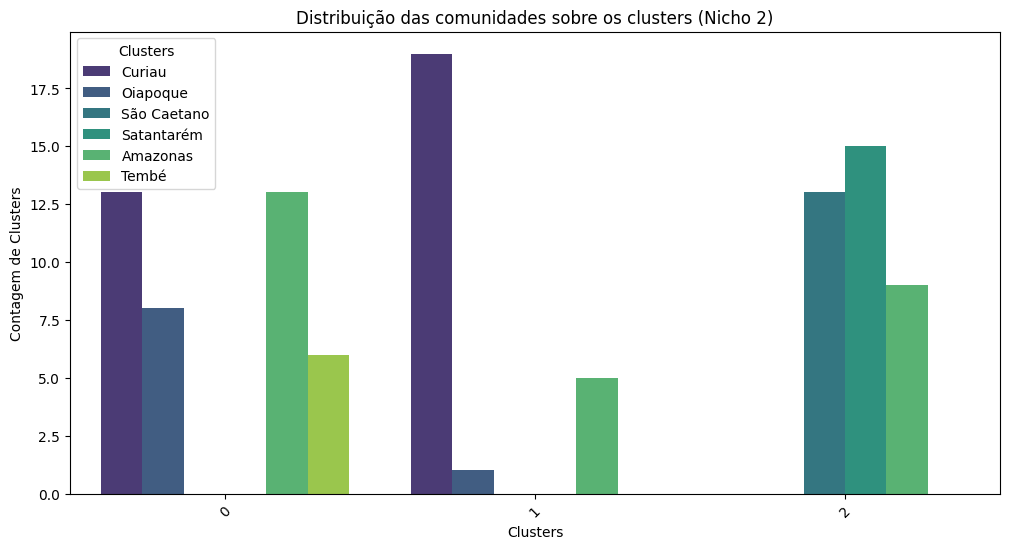

In [ ]:
import seaborn as sns

# Crie um gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=clustersDf, hue='Comunidades', x='cluster_predicted', palette='viridis')
plt.xticks(rotation=45)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.xlabel('Clusters')
plt.ylabel('Contagem de Clusters')
plt.title('Distribuição das comunidades sobre os clusters (Nicho 2)')
plt.legend(title='Clusters')
plt.show()

<ipython-input-23-74d4a6939f0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diversidade_cult_df['cluster_predicted'] = combinedDf['cluster_predicted']
<ipython-input-23-74d4a6939f0e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  direitos_df['cluster_predicted'] = combinedDf['cluster_predicted']
<ipython-input-23-74d4a6939f0e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

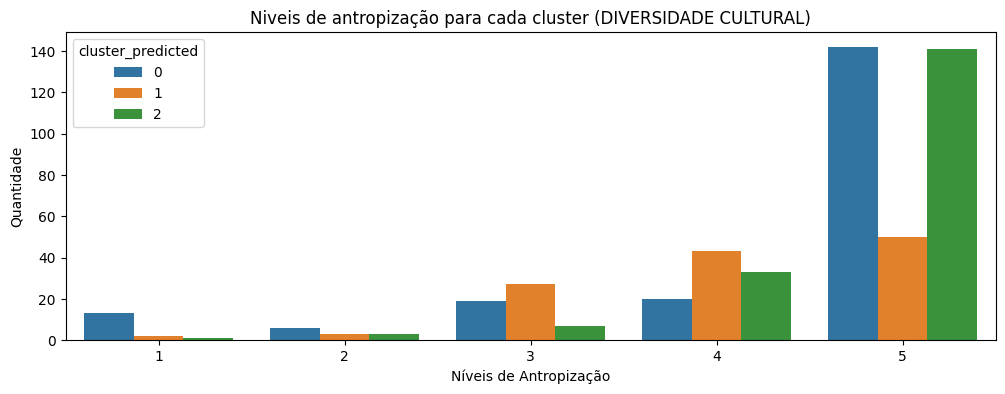

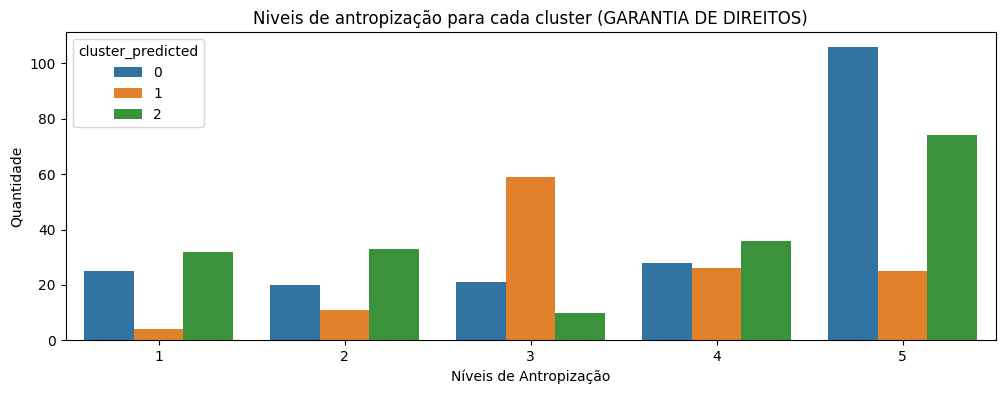

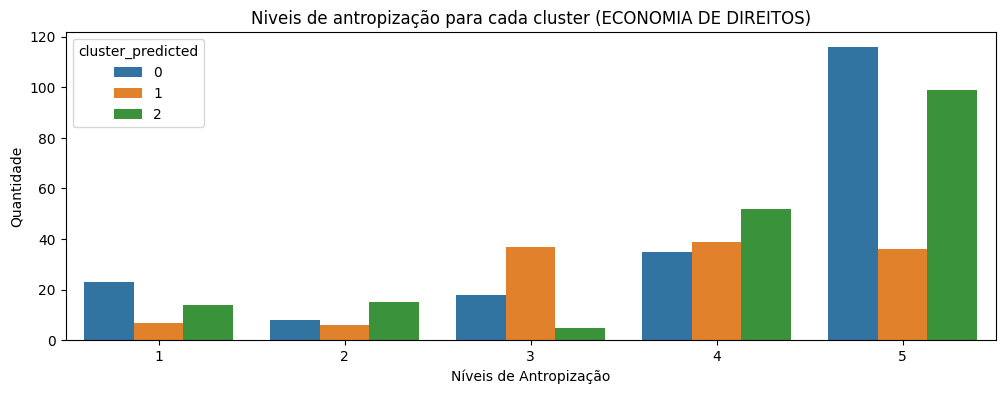

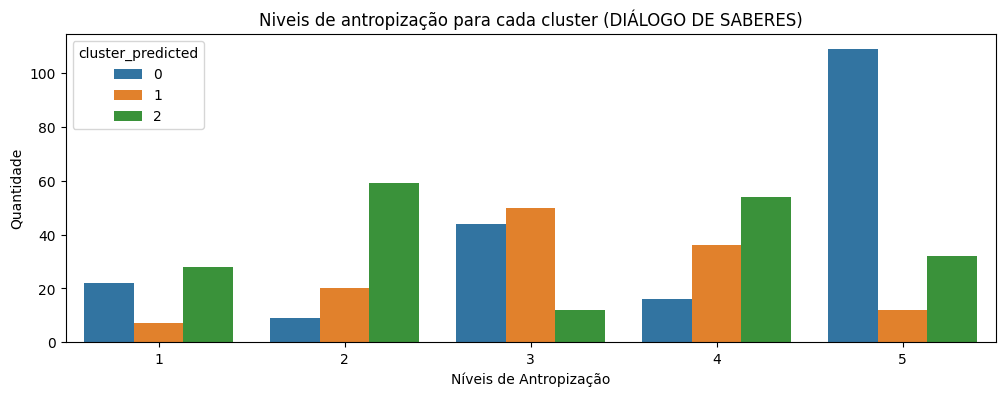

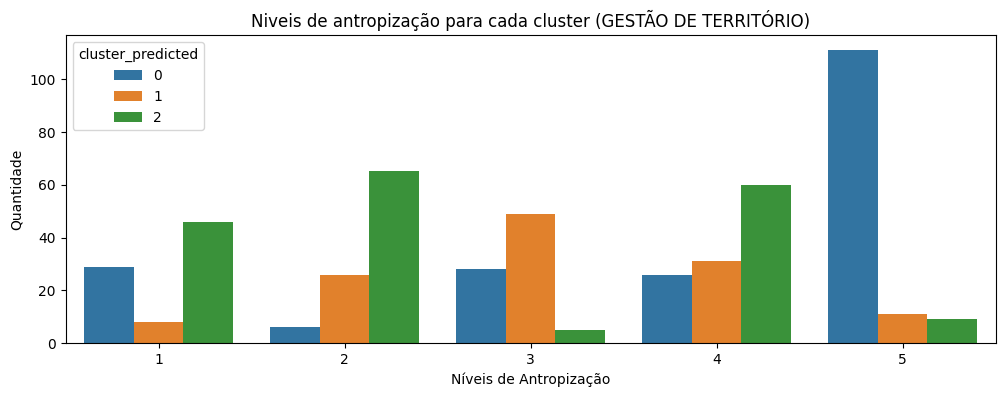

In [ ]:
diversidade_cult = ['P51', 'P52', 'P53', 'P54', 'P55']
diversidade_cult_df = combinedDf[diversidade_cult]
diversidade_cult_df['cluster_predicted'] = combinedDf['cluster_predicted']
diversidade_cult_df = pd.melt(diversidade_cult_df, id_vars=['cluster_predicted'], var_name='Coluna', value_name='Valores')

direitos = ['P56', 'P57', 'P58', 'P59', 'P60']
direitos_df = combinedDf[direitos]
direitos_df['cluster_predicted'] = combinedDf['cluster_predicted']
direitos_df = pd.melt(direitos_df, id_vars=['cluster_predicted'], var_name='Coluna', value_name='Valores')

economia = ['P61', 'P62', 'P63', 'P64', 'P65']
economia_df = combinedDf[economia]
economia_df['cluster_predicted'] = combinedDf['cluster_predicted']
economia_df = pd.melt(economia_df, id_vars=['cluster_predicted'], var_name='Coluna', value_name='Valores')

dialogo = ['P66', 'P67', 'P68', 'P69', 'P70']
dialogo_df = combinedDf[dialogo]
dialogo_df['cluster_predicted'] = combinedDf['cluster_predicted']
dialogo_df = pd.melt(dialogo_df, id_vars=['cluster_predicted'], var_name='Coluna', value_name='Valores')

gestao_territorio = ['P71', 'P72', 'P73', 'P74', 'P75']
gestao_territorio_df = combinedDf[gestao_territorio]
gestao_territorio_df['cluster_predicted'] = combinedDf['cluster_predicted']
gestao_territorio_df = pd.melt(gestao_territorio_df, id_vars=['cluster_predicted'], var_name='Coluna', value_name='Valores')

# Plotar o countplot
plt.figure(figsize=(12, 4))
sns.countplot(data=diversidade_cult_df, x='Valores', hue='cluster_predicted')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (DIVERSIDADE CULTURAL)')

plt.figure(figsize=(12, 4))
sns.countplot(data=direitos_df, x='Valores', hue='cluster_predicted')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (GARANTIA DE DIREITOS)')

plt.figure(figsize=(12, 4))
sns.countplot(data=economia_df, x='Valores', hue='cluster_predicted')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (ECONOMIA DE DIREITOS)')

plt.figure(figsize=(12, 4))
sns.countplot(data=dialogo_df, x='Valores', hue='cluster_predicted')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (DIÁLOGO DE SABERES)')

plt.figure(figsize=(12, 4))
sns.countplot(data=gestao_territorio_df, x='Valores', hue='cluster_predicted')
plt.xlabel('Níveis de Antropização')
plt.ylabel('Quantidade')
plt.title('Niveis de antropização para cada cluster (GESTÃO DE TERRITÓRIO)')

plt.show()

<ipython-input-25-9b059401b229>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_predicted'] = combinedDf['cluster_predicted']
<ipython-input-25-9b059401b229>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_predicted'] = combinedDf['cluster_predicted']
<ipython-input-25-9b059401b229>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

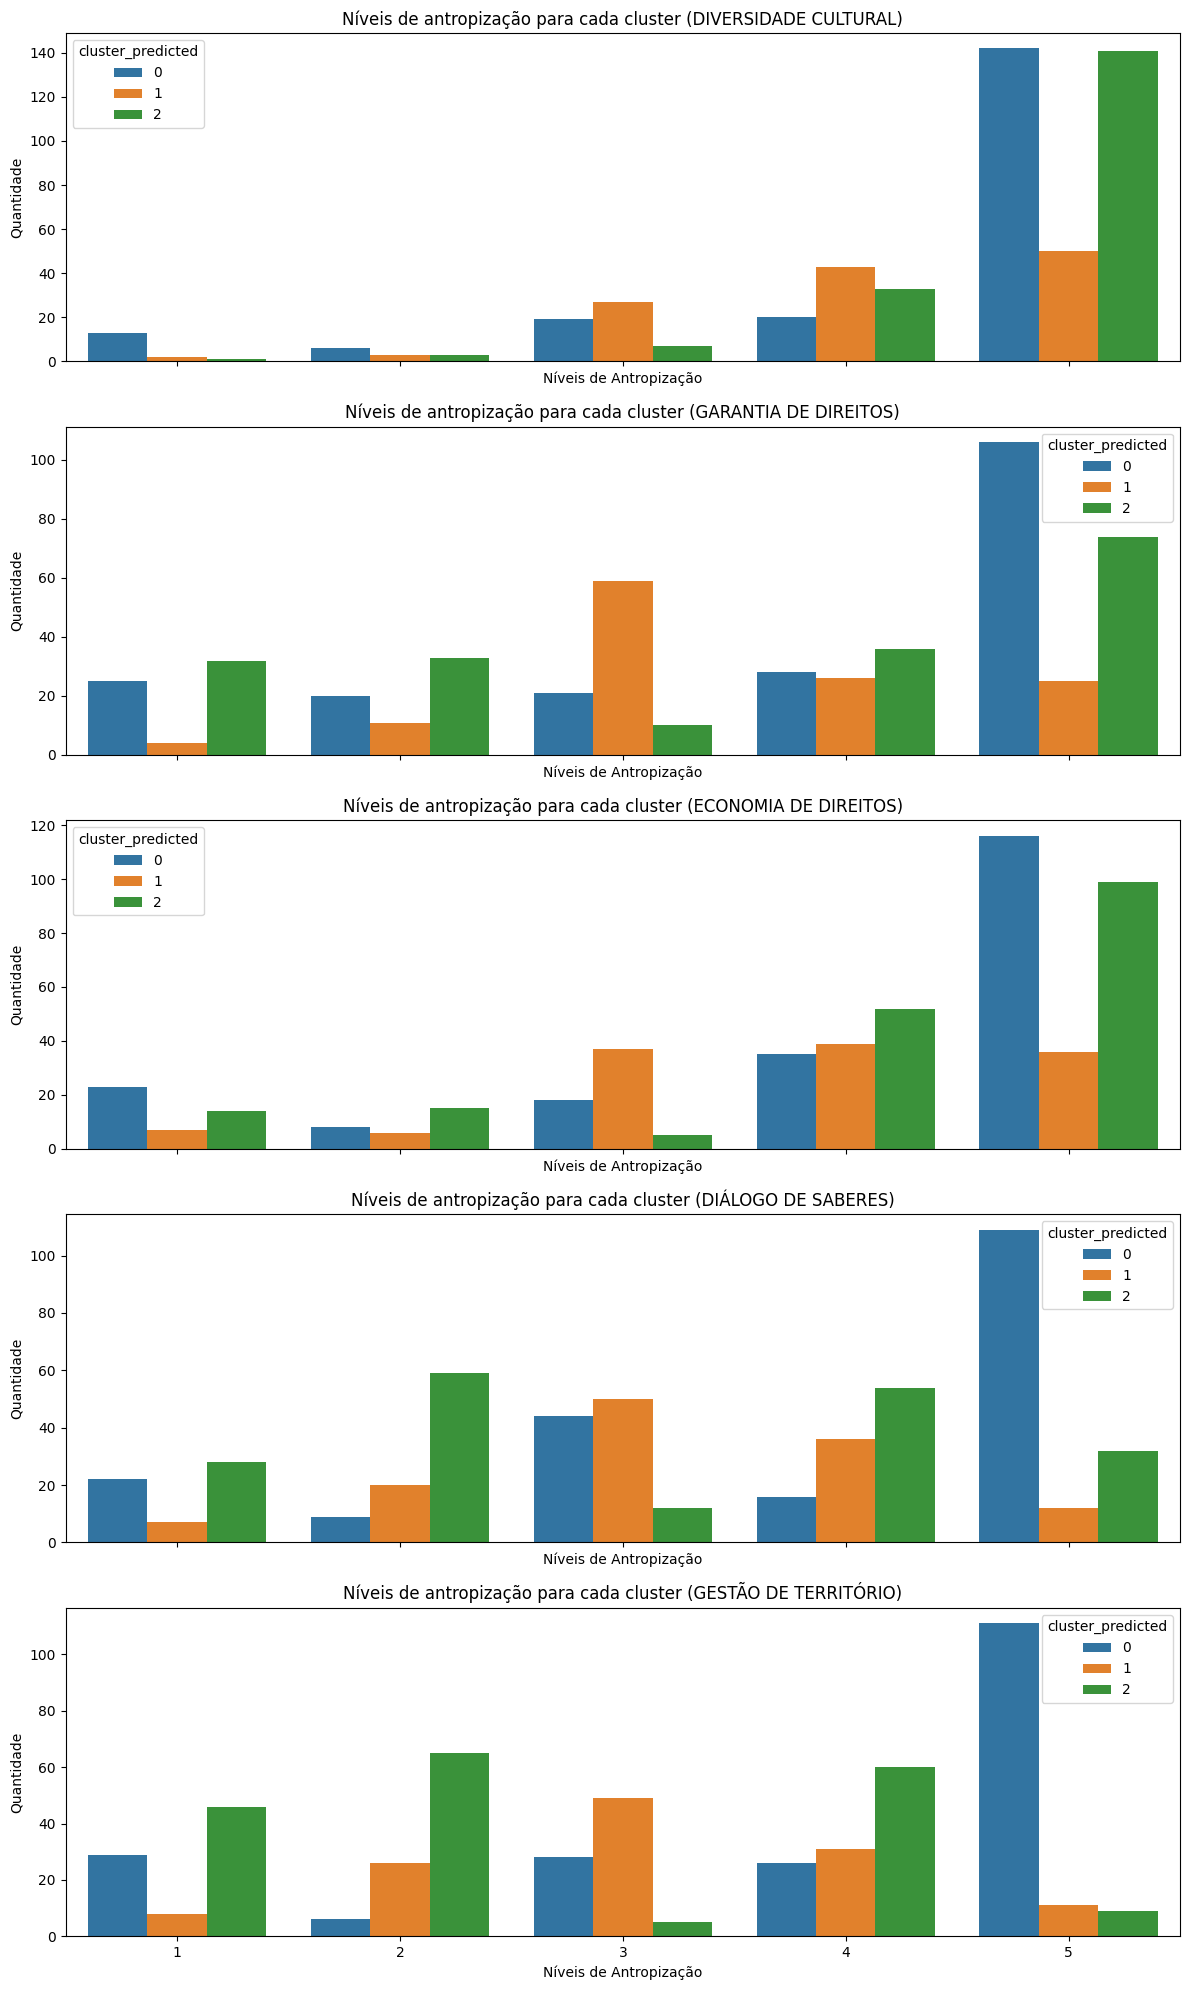

In [ ]:
categorias = {
    'DIVERSIDADE CULTURAL': ['P51', 'P52', 'P53', 'P54', 'P55'],
    'GARANTIA DE DIREITOS': ['P56', 'P57', 'P58', 'P59', 'P60'],
    'ECONOMIA DE DIREITOS': ['P61', 'P62', 'P63', 'P64', 'P65'],
    'DIÁLOGO DE SABERES': ['P66', 'P67', 'P68', 'P69', 'P70'],
    'GESTÃO DE TERRITÓRIO': ['P71', 'P72', 'P73', 'P74', 'P75']
}

# Criar uma figura com vários subplots
fig, axs = plt.subplots(len(categorias), 1, figsize=(12, 4 * len(categorias)), sharex=True)

# Plotar cada categoria em um subplot
for i, (categoria, colunas) in enumerate(categorias.items()):
    df = combinedDf[colunas]
    df['cluster_predicted'] = combinedDf['cluster_predicted']
    df = pd.melt(df, id_vars=['cluster_predicted'], var_name='Coluna', value_name='Valores')

    sns.countplot(data=df, x='Valores', hue='cluster_predicted', ax=axs[i])
    axs[i].set_xlabel('Níveis de Antropização')
    axs[i].set_ylabel('Quantidade')
    axs[i].set_title(f'Níveis de antropização para cada cluster ({categoria})')

# Ajustar espaçamento entre subplots
plt.tight_layout()

# Mostrar a figura
plt.show()